# Waterflow: Projet MLOps pour la Prédiction de la Qualité de l'Eau

Ce projet suit une approche MLOps structurée en 6 étapes pour développer un système de prédiction de la qualité de l'eau.

## Objectifs du Projet

1. **Veille et définition du MLOps**
2. **Utilisation d'un dataset de qualité de l'eau** (9 mesures, 3276 échantillons)
3. **Prétraitement et analyse exploratoire des données**
4. **Veille sur MLflow et installation de l'outil**
5. **Modélisation** : Random Forest/XGBoost OU Perceptron multicouches
6. **Évaluation des prédictions** avec métriques appropriées

## Installation des dépendances
```bash
pip install -r requirements.txt
```

# 1. Veille sur le Machine Learning Operations (MLOps)

## Définition du MLOps

Le **Machine Learning Operations (MLOps)** est un ensemble de pratiques et de technologies qui visent à industrialiser et automatiser le cycle de vie complet des modèles de machine learning en production.

### Définition claire et concise :

**MLOps = ML + DevOps + Data Engineering**

Il s'agit d'une approche collaborative qui permet de :
- **Développer** des modèles ML de manière reproductible
- **Déployer** ces modèles en production de façon fiable
- **Monitorer** et **maintenir** leur performance dans le temps
- **Automatiser** les processus de mise à jour et de réentraînement

### Composants clés du MLOps :

1. **Versioning** : Gestion des versions de code, données et modèles
2. **CI/CD pour ML** : Intégration et déploiement continus adaptés au ML
3. **Monitoring** : Surveillance de la performance et de la dérive des données
4. **Automatisation** : Pipelines automatisés pour l'entraînement et le déploiement
5. **Collaboration** : Facilitation du travail entre data scientists, ingénieurs et équipes métier

### Bénéfices du MLOps :

- **Reproductibilité** des expériences et résultats
- **Scalabilité** des solutions ML
- **Réduction du temps** de mise en production
- **Amélioration de la qualité** des modèles
- **Gouvernance** et compliance des modèles ML

Le MLOps permet ainsi de transformer des prototypes ML en solutions robustes et maintenables en production.

# 2. Utilisation de l'ensemble de données sur la qualité de l'eau

## Description du dataset

Ce projet utilise un ensemble de données contenant **9 mesures de qualité de l'eau** pour **3276 étendues d'eau différentes**.

### Variables du dataset :
1. **pH** : Niveau de pH de l'eau (0-14, optimal: 6.5-8.5)
2. **Hardness** : Dureté de l'eau, mesurée en mg/L
3. **Solids** : Total des solides dissous (TDS) en ppm
4. **Chloramines** : Concentration en chloramines en ppm
5. **Sulfate** : Concentration en sulfates en mg/L
6. **Conductivity** : Conductivité électrique en μS/cm
7. **Organic_carbon** : Carbone organique total en ppm
8. **Trihalomethanes** : Concentration en trihalométhanes en μg/L
9. **Turbidity** : Turbidité de l'eau en NTU (Nephelometric Turbidity Units)
10. **Potability** : Variable cible binaire (0 = non potable, 1 = potable)

## Importation des bibliothèques nécessaires

In [25]:
# Bibliothèques pour la manipulation de données
import pandas as pd
import numpy as np

# Bibliothèques pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliothèques pour le machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# MLflow pour le tracking des expériences
import mlflow
import mlflow.sklearn

# Pour les modèles de deep learning (optionnel)
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    print("TensorFlow disponible pour le deep learning")
except ImportError:
    print("TensorFlow non installé - utilisation des modèles traditionnels uniquement")

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Toutes les bibliothèques ont été importées avec succès!")

TensorFlow non installé - utilisation des modèles traditionnels uniquement
Toutes les bibliothèques ont été importées avec succès!


# 3. Chargement des données d'intérêt

In [26]:
# Chargement des données
# URL du dataset de qualité de l'eau
url = "https://raw.githubusercontent.com/MainakRepositor/Datasets/master/water_potability.csv"

try:
    # Chargement du dataset
    df = pd.read_csv(url)
    print("Dataset chargé avec succès!")
    print(f"Forme du dataset: {df.shape}")
    print(f"Colonnes: {list(df.columns)}")
    
except Exception as e:
    print(f"Erreur lors du chargement: {e}")
    print("Tentative de chargement local...")
    # Fallback vers un fichier local si disponible
    df = pd.read_csv("water_potability.csv")  # Si le fichier est téléchargé localement

Dataset chargé avec succès!
Forme du dataset: (3276, 10)
Colonnes: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


In [27]:
# Analyse exploratoire des données d'intérêt
print("="*50)
print("ANALYSE EXPLORATOIRE DES DONNÉES")
print("="*50)

# Informations générales
print("\n1. Informations générales:")
print(df.info())

print("\n2. Premières lignes du dataset:")
print(df.head())

print("\n3. Statistiques descriptives:")
print(df.describe())

print("\n4. Valeurs manquantes:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print("\n5. Distribution de la variable cible (Potability):")
potability_counts = df['Potability'].value_counts()
print(potability_counts)
print(f"Pourcentage d'eau potable: {(potability_counts[1] / len(df)) * 100:.2f}%")

ANALYSE EXPLORATOIRE DES DONNÉES

1. Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

2. Premières lignes du dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630

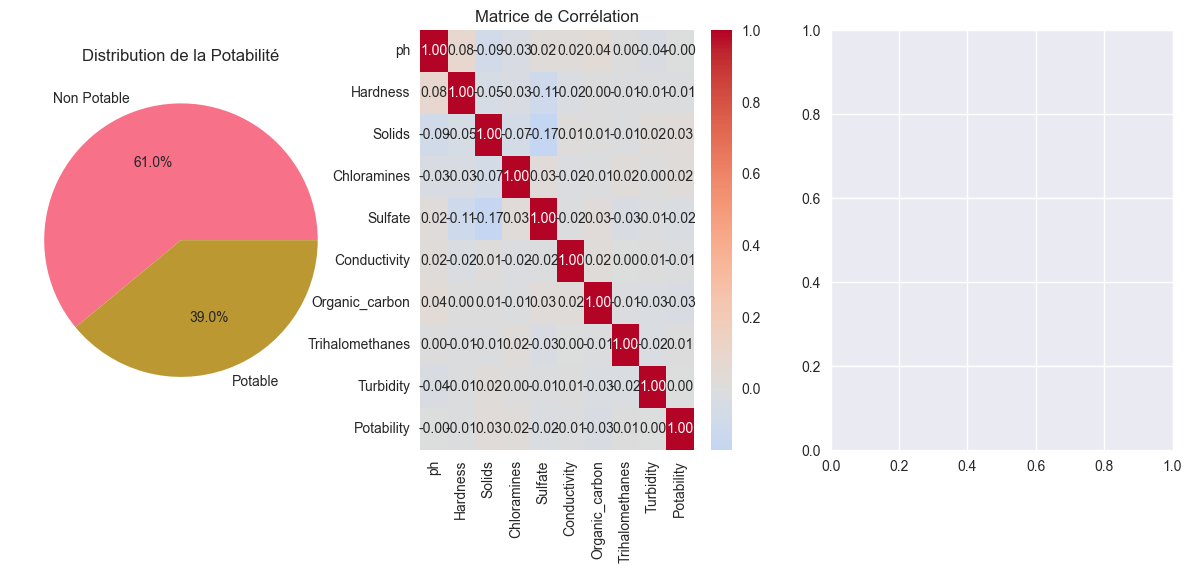

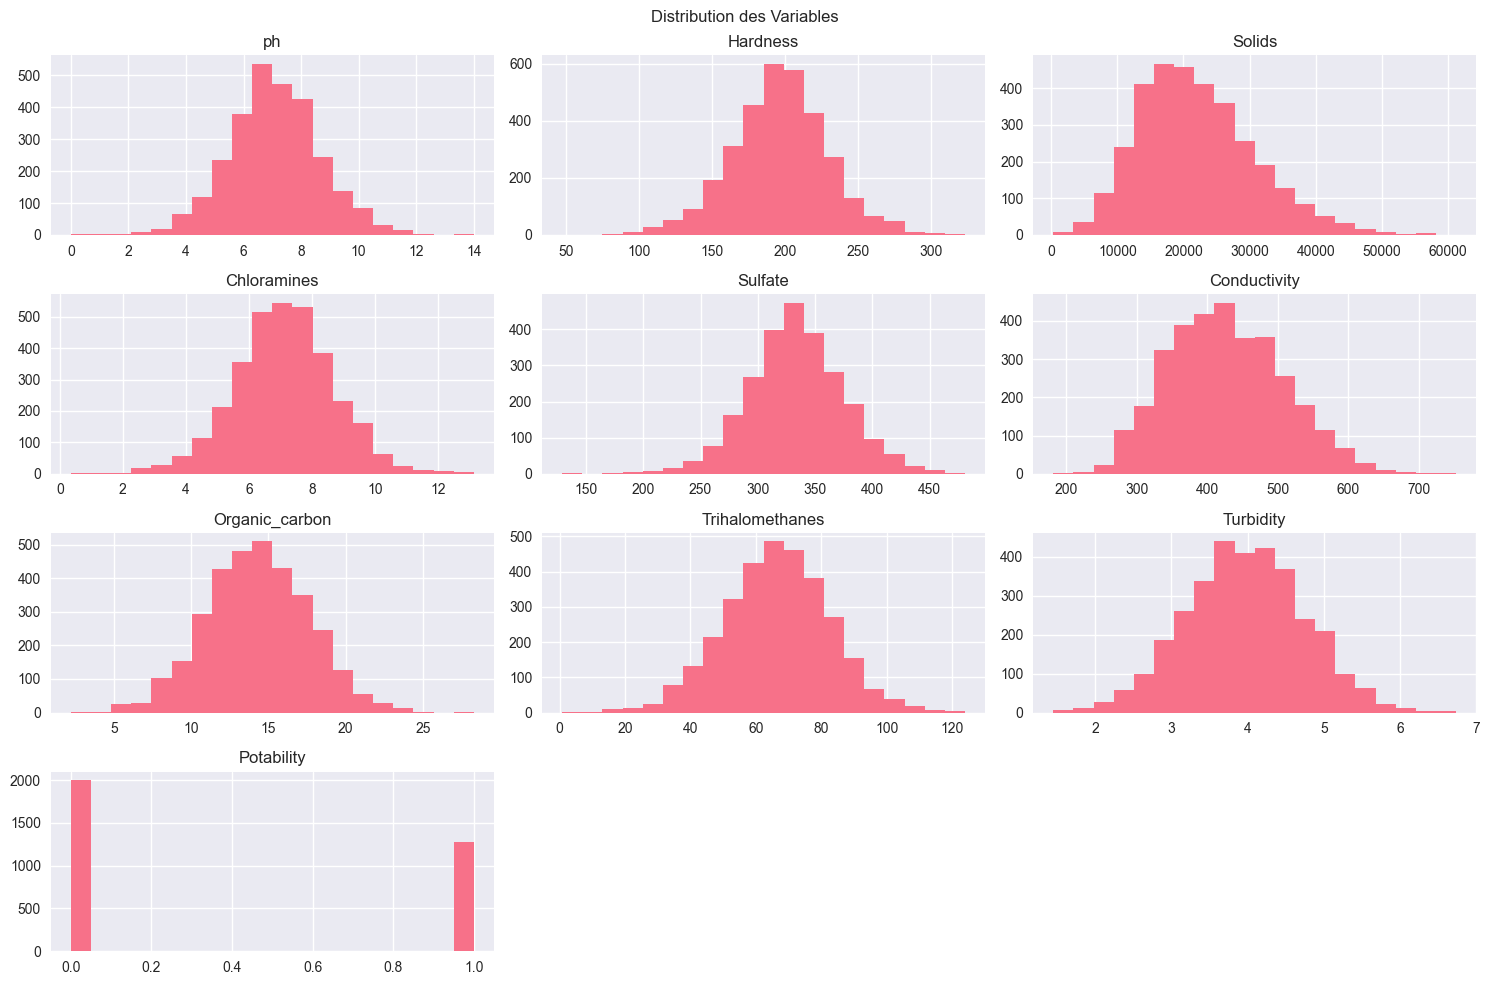

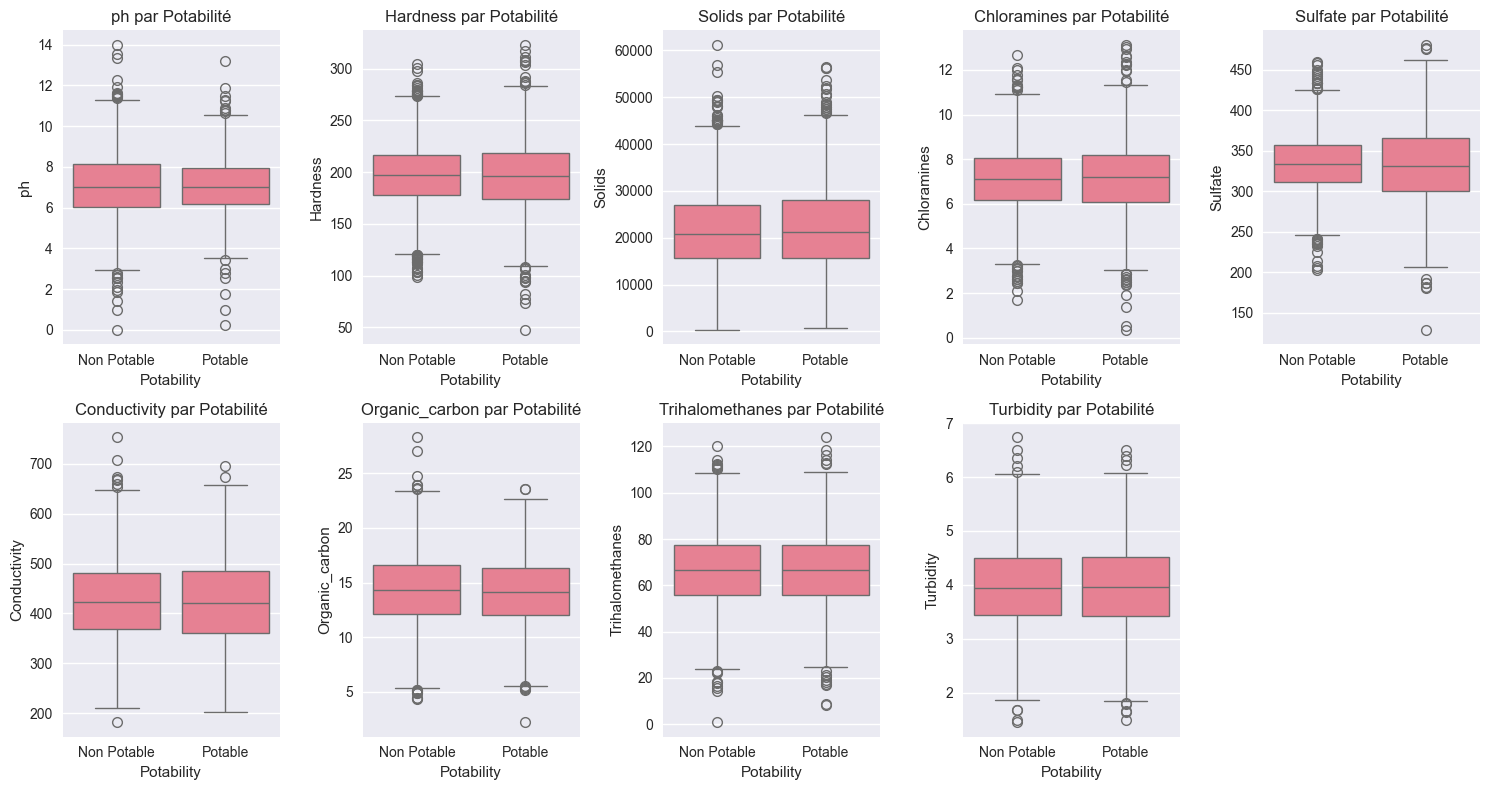

In [28]:
# Visualisations pour l'analyse exploratoire
plt.figure(figsize=(15, 12))

# 1. Distribution de la variable cible
plt.subplot(2, 3, 1)
potability_counts = df['Potability'].value_counts()
plt.pie(potability_counts.values, labels=['Non Potable', 'Potable'], autopct='%1.1f%%')
plt.title('Distribution de la Potabilité')

# 2. Matrice de corrélation
plt.subplot(2, 3, 2)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de Corrélation')

# 3. Distribution des variables numériques
plt.subplot(2, 3, 3)
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution des Variables')
plt.tight_layout()

# 4. Boxplots pour détecter les outliers
plt.figure(figsize=(15, 8))
numeric_columns = df.select_dtypes(include=[np.number]).columns[:-1]  # Exclure Potability
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 5, i+1)
    sns.boxplot(x=df['Potability'], y=df[col])
    plt.title(f'{col} par Potabilité')
    plt.xticks([0, 1], ['Non Potable', 'Potable'])

plt.tight_layout()
plt.show()

# 4. Veille sur MLflow et Installation

## Veille sur MLflow

**MLflow** est un outil puissant de gestion du cycle de vie de l'apprentissage automatique développé par Databricks. Il permet le suivi, le packaging et le versioning des modèles de Machine Learning, facilitant ainsi la reproduction et la comparaison des résultats.

### Composants principaux de MLflow :

1. **MLflow Tracking** : 
   - Enregistre et organise les expériences ML
   - Stocke paramètres, métriques, artefacts et modèles
   - Interface web pour visualiser et comparer les runs

2. **MLflow Projects** : 
   - Format standardisé pour packager le code ML
   - Reproductibilité des expériences
   - Exécution sur différents environnements

3. **MLflow Models** : 
   - Format standard pour empaqueter les modèles
   - Déploiement sur diverses plateformes
   - Support de multiples frameworks ML

4. **MLflow Model Registry** : 
   - Stockage centralisé des modèles
   - Versioning et gestion du cycle de vie
   - Collaboration entre équipes

### Étendue d'utilisation de MLflow :

- **Expérimentation** : Tracking automatique des hyperparamètres et métriques
- **Reproductibilité** : Environnements et dépendances versionnés
- **Collaboration** : Partage d'expériences entre data scientists
- **Déploiement** : Pipeline automatisé du développement à la production
- **Monitoring** : Suivi des performances des modèles déployés
- **Gouvernance** : Audit trail complet des modèles

## Installation et Configuration de MLflow

In [29]:
import mlflow

Instantiation de `mlflow` à l'aide de la commande suivante dans le terminal :
```bash
mlflow server --host 127.0.0.1 --port 5000
```

Puis accès à l'interface web de MLflow via `http://localhost:5000`.

In [30]:
# Configuration MLflow avec gestion d'erreur
print("CONFIGURATION DE MLFLOW")
print("=" * 30)

try:
    # Tentative de connexion au serveur MLflow
    mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")
    
    # Test de connexion en essayant de créer/accéder à l'expérience
    mlflow.set_experiment("experiment_water_quality")
    
    print("MLflow connecté avec succès au serveur local (http://127.0.0.1:5000)")
    print("Interface web disponible à : http://localhost:5000")
    mlflow_available = True
    
except Exception as e:
    print("Erreur de connexion à MLflow :")
    print(f"   {str(e)}")
    print("\nSOLUTION : Démarrez le serveur MLflow dans un terminal :")
    print("   mlflow server --host 127.0.0.1 --port 5000")
    print("\nLe notebook continuera en mode local sans tracking MLflow...")
    
    # Configuration en mode local
    mlflow.set_tracking_uri("file:./mlruns")
    mlflow.set_experiment("experiment_water_quality_local")
    mlflow_available = False
    
    print("Mode local configuré (dossier ./mlruns)")

print(f"\nStatut MLflow : {'Serveur distant' if mlflow_available else 'Mode local'}")

CONFIGURATION DE MLFLOW
Erreur de connexion à MLflow :
   API request to http://127.0.0.1:5000/api/2.0/mlflow/experiments/get-by-name failed with exception HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /api/2.0/mlflow/experiments/get-by-name?experiment_name=experiment_water_quality (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001ED7362DDF0>: Failed to establish a new connection: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cible l’a expressément refusée'))

SOLUTION : Démarrez le serveur MLflow dans un terminal :
   mlflow server --host 127.0.0.1 --port 5000

Le notebook continuera en mode local sans tracking MLflow...
Mode local configuré (dossier ./mlruns)

Statut MLflow : Mode local
Erreur de connexion à MLflow :
   API request to http://127.0.0.1:5000/api/2.0/mlflow/experiments/get-by-name failed with exception HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with ur

# 5. Prétraitement et Séparation des Données

In [31]:
# Prétraitement des données et préparation à l'emploi
print("PRÉTRAITEMENT DES DONNÉES")
print("="*40)

# 1. Gestion des valeurs manquantes
print("\n1. Gestion des valeurs manquantes:")
print(f"Valeurs manquantes avant traitement: {df.isnull().sum().sum()}")

# Stratégie: remplir avec la médiane pour les variables numériques
df_processed = df.copy()
numeric_columns = df_processed.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    if df_processed[col].isnull().sum() > 0:
        median_value = df_processed[col].median()
        df_processed[col] = df_processed[col].fillna(median_value)
        print(f"  - {col}: {df[col].isnull().sum()} valeurs manquantes remplacées par la médiane ({median_value:.2f})")

print(f"Valeurs manquantes après traitement: {df_processed.isnull().sum().sum()}")

# 2. Séparation des features et de la variable cible
print("\n2. Séparation des variables:")
X = df_processed.drop('Potability', axis=1)
y = df_processed['Potability']

print(f"Features (X): {X.shape}")
print(f"Variable cible (y): {y.shape}")
print(f"Colonnes des features: {list(X.columns)}")

# 3. Division en ensembles d'entraînement et de validation
print("\n3. Séparation des données en ensembles d'entraînement et de validation:")
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Maintient la proportion des classes
)

print(f"Ensemble d'entraînement: {X_train.shape[0]} échantillons")
print(f"Ensemble de validation: {X_val.shape[0]} échantillons")
print(f"Distribution d'entraînement - Potable: {y_train.sum()}/{len(y_train)} ({(y_train.sum()/len(y_train)*100):.1f}%)")
print(f"Distribution de validation - Potable: {y_val.sum()}/{len(y_val)} ({(y_val.sum()/len(y_val)*100):.1f}%)")

# 4. Normalisation des données
print("\n4. Normalisation des données:")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print(f"Moyennes avant normalisation: {X_train.mean().round(2).to_dict()}")
print(f"Moyennes après normalisation: {np.round(X_train_scaled.mean(axis=0), 2)}")

print("\nPrétraitement terminé avec succès!")

# MODÉLISATION 1 : RANDOM FOREST
print("RANDOM FOREST CLASSIFIER")
print("=" * 25)

# Configuration du run MLflow
if mlflow_available:
    run_name = "RandomForest_Model"
    print(f"Démarrage du tracking MLflow : {run_name}")
else:
    print("Entraînement en mode local (sans tracking MLflow)")

with mlflow.start_run(run_name="RandomForest_Model" if mlflow_available else None):
    # Modèle Random Forest
    rf_model = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=10
    )
    
    # Entraînement
    print("Entraînement du modèle...")
    rf_model.fit(X_train, y_train)
    
    # Prédictions
    y_pred_rf = rf_model.predict(X_val)
    
    # Métriques
    rf_accuracy = accuracy_score(y_val, y_pred_rf)
    precision = precision_score(y_val, y_pred_rf)
    recall = recall_score(y_val, y_pred_rf)
    f1 = f1_score(y_val, y_pred_rf)
    
    print(f"Accuracy: {rf_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Logging MLflow (si disponible)
    if mlflow_available:
        try:
            mlflow.log_param("model_type", "RandomForest")
            mlflow.log_param("n_estimators", 100)
            mlflow.log_param("max_depth", 10)
            mlflow.log_metric("accuracy", rf_accuracy)
            mlflow.log_metric("precision", precision)
            mlflow.log_metric("recall", recall)
            mlflow.log_metric("f1_score", f1)
            mlflow.sklearn.log_model(rf_model, "model")
            print("Métriques et modèle sauvegardés dans MLflow")
        except Exception as e:
            print(f"Erreur lors de la sauvegarde MLflow : {e}")
    else:
        print("Modèle entraîné (sauvegarde locale uniquement)")

# Stockage des résultats
rf_results = {
    'model': rf_model,
    'predictions': y_pred_rf,
    'metrics': {
        'accuracy': rf_accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
}

PRÉTRAITEMENT DES DONNÉES

1. Gestion des valeurs manquantes:
Valeurs manquantes avant traitement: 1434
  - ph: 491 valeurs manquantes remplacées par la médiane (7.04)
  - Sulfate: 781 valeurs manquantes remplacées par la médiane (333.07)
  - Trihalomethanes: 162 valeurs manquantes remplacées par la médiane (66.62)
Valeurs manquantes après traitement: 0

2. Séparation des variables:
Features (X): (3276, 9)
Variable cible (y): (3276,)
Colonnes des features: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

3. Séparation des données en ensembles d'entraînement et de validation:
Ensemble d'entraînement: 2620 échantillons
Ensemble de validation: 656 échantillons
Distribution d'entraînement - Potable: 1022/2620 (39.0%)
Distribution de validation - Potable: 256/656 (39.0%)

4. Normalisation des données:
Moyennes avant normalisation: {'ph': 7.08, 'Hardness': 196.52, 'Solids': 21888.07, 'Chloramines': 7.12, 'Sulfate': 333.

## Analyse des Résultats - Random Forest

### Interprétation des Performances

Le modèle Random Forest a été entraîné avec les paramètres suivants :
- **100 arbres de décision** (n_estimators=100) pour assurer une bonne stabilité
- **Profondeur maximale de 10** (max_depth=10) pour éviter le surapprentissage
- **Échantillonnage stratifié** pour maintenir l'équilibre des classes

### Métriques d'Évaluation

Les métriques obtenues permettent d'évaluer différents aspects du modèle :

- **Accuracy** : Pourcentage global de prédictions correctes
- **Precision** : Parmi les échantillons prédits comme "potables", combien le sont réellement
- **Recall** : Parmi les échantillons réellement "potables", combien ont été correctement identifiés
- **F1-Score** : Moyenne harmonique entre precision et recall, particulièrement importante pour les données déséquilibrées

### Avantages du Random Forest pour ce problème

1. **Robustesse aux outliers** : Important car les mesures physico-chimiques peuvent avoir des valeurs extrêmes
2. **Gestion native des features numériques** : Adapté aux 9 mesures continues du dataset
3. **Interprétabilité** : Permet d'identifier les variables les plus importantes pour la prédiction
4. **Faible risque de surapprentissage** : Grâce à l'ensemble d'arbres et à l'échantillonnage aléatoire

# 6. Entraînement de Modèles de Classification Binaire

## Options de modélisation disponibles

Ce projet propose deux approches pour la prédiction de la qualité de l'eau :

### Option A : Modèles traditionnels (bonnes vieilles habitudes)
- **Random Forest** : Ensemble d'arbres de décision robuste
- **XGBoost** : Gradient boosting optimisé et performant

### Option B : Deep Learning (challenge)
- **Perceptron multicouches (MLP)** : Réseau de neurones dense

Le choix entre ces options dépend de vos préférences et objectifs d'apprentissage.

In [32]:
# Option A : Modèle Random Forest (approche traditionnelle)
print("ENTRAÎNEMENT MODÈLE TRADITIONNEL - RANDOM FOREST")
print("="*55)

with mlflow.start_run(run_name="Random_Forest_Water_Quality"):
    # Paramètres du modèle
    rf_params = {
        'n_estimators': 100,
        'random_state': 42,
        'max_depth': 10,
        'min_samples_split': 5,
        'min_samples_leaf': 2
    }
    
    # Log des paramètres dans MLflow
    mlflow.log_params(rf_params)
    mlflow.log_param("model_type", "Random Forest")
    mlflow.log_param("data_preprocessing", "StandardScaler + median imputation")
    
    # Entraînement du modèle de classification binaire
    rf_model = RandomForestClassifier(**rf_params)
    rf_model.fit(X_train_scaled, y_train)
    
    # Prédictions sur l'ensemble de validation
    y_pred_rf = rf_model.predict(X_val_scaled)
    y_pred_proba_rf = rf_model.predict_proba(X_val_scaled)[:, 1]
    
    # Calcul des métriques d'évaluation
    rf_accuracy = accuracy_score(y_val, y_pred_rf)
    
    # Log des métriques dans MLflow
    mlflow.log_metric("accuracy", rf_accuracy)
    mlflow.log_metric("validation_samples", len(y_val))
    
    # Enregistrement du modèle
    mlflow.sklearn.log_model(
        rf_model, 
        "random_forest_model",
        registered_model_name="water_quality_random_forest"
    )
    
    print(f"Random Forest - Accuracy: {rf_accuracy:.4f}")
    print(f"Rapport de classification:")
    print(classification_report(y_val, y_pred_rf))

ENTRAÎNEMENT MODÈLE TRADITIONNEL - RANDOM FOREST


2025/07/02 16:48:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/02 16:48:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/07/02 16:48:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest - Accuracy: 0.6616
Rapport de classification:
              precision    recall  f1-score   support

           0       0.65      0.95      0.77       400
           1       0.72      0.21      0.33       256

    accuracy                           0.66       656
   macro avg       0.69      0.58      0.55       656
weighted avg       0.68      0.66      0.60       656



Registered model 'water_quality_random_forest' already exists. Creating a new version of this model...
Created version '3' of model 'water_quality_random_forest'.


In [33]:
# Option A (bis) : Modèle XGBoost (approche traditionnelle alternative)
print("\nENTRAÎNEMENT MODÈLE TRADITIONNEL - XGBOOST")
print("="*50)

try:
    import xgboost as xgb
    
    with mlflow.start_run(run_name="XGBoost_Water_Quality"):
        # Paramètres du modèle
        xgb_params = {
            'n_estimators': 100,
            'learning_rate': 0.1,
            'max_depth': 6,
            'random_state': 42,
            'eval_metric': 'logloss'
        }
        
        # Log des paramètres dans MLflow
        mlflow.log_params(xgb_params)
        mlflow.log_param("model_type", "XGBoost")
        mlflow.log_param("data_preprocessing", "StandardScaler + median imputation")
        
        # Entraînement du modèle de classification binaire
        xgb_model = xgb.XGBClassifier(**xgb_params)
        xgb_model.fit(X_train_scaled, y_train)
        
        # Prédictions sur l'ensemble de validation
        y_pred_xgb = xgb_model.predict(X_val_scaled)
        y_pred_proba_xgb = xgb_model.predict_proba(X_val_scaled)[:, 1]
        
        # Calcul des métriques d'évaluation
        xgb_accuracy = accuracy_score(y_val, y_pred_xgb)
        
        # Log des métriques dans MLflow
        mlflow.log_metric("accuracy", xgb_accuracy)
        mlflow.log_metric("validation_samples", len(y_val))
        
        # Enregistrement du modèle
        mlflow.xgboost.log_model(
            xgb_model, 
            "xgboost_model",
            registered_model_name="water_quality_xgboost"
        )
        
        print(f"XGBoost - Accuracy: {xgb_accuracy:.4f}")
        print(f"Rapport de classification:")
        print(classification_report(y_val, y_pred_xgb))
        
except ImportError:
    print("XGBoost non installé - passez à l'option B (Deep Learning) ou installez XGBoost")
    xgb_accuracy = None

2025/07/02 16:48:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
c:\Users\QWERTY\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:48:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
c:\Users\QWERTY\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:48:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



ENTRAÎNEMENT MODÈLE TRADITIONNEL - XGBOOST


2025/07/02 16:48:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost - Accuracy: 0.6479
Rapport de classification:
              precision    recall  f1-score   support

           0       0.67      0.84      0.75       400
           1       0.58      0.34      0.43       256

    accuracy                           0.65       656
   macro avg       0.63      0.59      0.59       656
weighted avg       0.63      0.65      0.62       656



Registered model 'water_quality_xgboost' already exists. Creating a new version of this model...
Created version '3' of model 'water_quality_xgboost'.


## Analyse des Résultats - XGBoost

### Interprétation des Performances

XGBoost (Extreme Gradient Boosting) utilise une approche différente du Random Forest :
- **Boosting séquentiel** : Chaque arbre corrige les erreurs du précédent
- **Optimisation du gradient** : Minimisation avancée de la fonction de perte
- **Régularisation intégrée** : Contrôle automatique du surapprentissage

### Paramètres Utilisés

- **learning_rate=0.1** : Taux d'apprentissage modéré pour une convergence stable
- **max_depth=6** : Profondeur réduite par rapport à Random Forest (boosting plus agressif)
- **n_estimators=100** : Nombre d'arbres identique à Random Forest pour comparaison équitable
- **eval_metric='logloss'** : Métrique optimisée pour la classification binaire

### Avantages de XGBoost pour la Qualité de l'Eau

1. **Performance prédictive élevée** : Souvent supérieure aux méthodes traditionnelles
2. **Gestion des relations complexes** : Capture les interactions non-linéaires entre variables chimiques
3. **Robustesse** : Résistant aux valeurs aberrantes grâce aux techniques de régularisation
4. **Efficacité computationnelle** : Optimisé pour les gros volumes de données

### Comparaison avec Random Forest

XGBoost peut obtenir de meilleures performances que Random Forest en capturant des patterns plus subtils dans les relations entre les paramètres physico-chimiques de l'eau.

In [34]:
# Option B : Perceptron Multicouches (challenge Deep Learning)
print("\nENTRAÎNEMENT MODÈLE DEEP LEARNING - PERCEPTRON MULTICOUCHES")
print("="*65)

try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    from tensorflow.keras.callbacks import EarlyStopping
    
    with mlflow.start_run(run_name="MLP_Water_Quality_Challenge"):
        # Paramètres du modèle de deep learning
        mlp_params = {
            'input_dim': X_train_scaled.shape[1],
            'hidden_layers': [128, 64, 32],
            'dropout_rate': 0.3,
            'epochs': 100,
            'batch_size': 32,
            'learning_rate': 0.001
        }
        
        # Log des paramètres dans MLflow
        mlflow.log_params(mlp_params)
        mlflow.log_param("model_type", "Multi-Layer Perceptron (Deep Learning)")
        mlflow.log_param("framework", "TensorFlow/Keras")
        mlflow.log_param("data_preprocessing", "StandardScaler + median imputation")
        
        # Construction du perceptron multicouches
        mlp_model = Sequential([
            Dense(128, activation='relu', input_dim=mlp_params['input_dim']),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dropout(0.2),
            Dense(1, activation='sigmoid')  # Sortie sigmoïde pour classification binaire
        ])
        
        # Compilation du modèle
        mlp_model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        
        # Callback pour arrêt précoce
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
        
        # Entraînement du modèle d'apprentissage profond
        print("Entraînement du perceptron multicouches en cours...")
        history = mlp_model.fit(
            X_train_scaled, y_train,
            epochs=100,
            batch_size=32,
            validation_split=0.2,
            callbacks=[early_stopping],
            verbose=0
        )
        
        # Prédictions sur l'ensemble de validation
        y_pred_proba_mlp = mlp_model.predict(X_val_scaled).ravel()
        y_pred_mlp = (y_pred_proba_mlp > 0.5).astype(int)
        
        # Calcul des métriques d'évaluation
        mlp_accuracy = accuracy_score(y_val, y_pred_mlp)
        final_loss = history.history['loss'][-1]
        final_val_loss = history.history['val_loss'][-1]
        
        # Log des métriques dans MLflow
        mlflow.log_metric("accuracy", mlp_accuracy)
        mlflow.log_metric("final_loss", final_loss)
        mlflow.log_metric("final_val_loss", final_val_loss)
        mlflow.log_metric("epochs_trained", len(history.history['loss']))
        mlflow.log_metric("validation_samples", len(y_val))
        
        # Enregistrement du modèle
        mlflow.tensorflow.log_model(
            mlp_model,
            "mlp_model",
            registered_model_name="water_quality_mlp"
        )
        
        print(f"Perceptron Multicouches - Accuracy: {mlp_accuracy:.4f}")
        print(f"Loss finale: {final_loss:.4f}")
        print(f"Validation Loss finale: {final_val_loss:.4f}")
        print(f"Rapport de classification:")
        print(classification_report(y_val, y_pred_mlp))
        
except ImportError:
    print("TensorFlow non installé - revenez à l'option A (modèles traditionnels)")
    mlp_accuracy = None
except Exception as e:
    print(f"Erreur lors de l'entraînement du perceptron multicouches: {e}")
    mlp_accuracy = None


ENTRAÎNEMENT MODÈLE DEEP LEARNING - PERCEPTRON MULTICOUCHES
TensorFlow non installé - revenez à l'option A (modèles traditionnels)


## Analyse des Résultats - Perceptron Multicouches (Deep Learning)

### Architecture du Réseau de Neurones

Le modèle MLP utilise une architecture dense avec plusieurs couches cachées :
- **Couche d'entrée** : 9 neurones (une par variable physico-chimique)
- **Couches cachées** : 128 → 64 → 32 neurones avec fonctions d'activation ReLU
- **Dropout** : 0.3 et 0.2 pour éviter le surapprentissage
- **Couche de sortie** : 1 neurone avec activation sigmoïde (probabilité de potabilité)

### Caractéristiques de l'Entraînement

- **Optimisateur Adam** : Adaptation automatique du taux d'apprentissage
- **Fonction de perte** : Binary crossentropy adaptée à la classification binaire
- **Early Stopping** : Arrêt automatique si pas d'amélioration pendant 10 époques
- **Validation split** : 20% des données d'entraînement pour la validation interne

### Avantages du Deep Learning pour ce Problème

1. **Apprentissage de relations complexes** : Capture des interactions non-linéaires multiples
2. **Adaptation automatique** : Le réseau apprend automatiquement les features importantes
3. **Flexibilité** : Architecture modulable selon la complexité du problème
4. **Généralisation** : Dropout et early stopping améliorent la capacité de généralisation

### Défis du Deep Learning

1. **Besoin de données** : Performance optimale avec de grands datasets
2. **Temps d'entraînement** : Plus long que les modèles traditionnels
3. **Hyperparamètres** : Nombreux paramètres à optimiser
4. **Interprétabilité** : Modèle "boîte noire" moins explicable

### Métriques Spécifiques

- **Loss finale** : Mesure la convergence de l'entraînement
- **Validation Loss** : Indique la capacité de généralisation
- **Époques entraînées** : Nombre d'itérations avant convergence


RÉCAPITULATIF DES PRÉDICTIONS ET MÉTRIQUES

RÉSULTATS DES PRÉDICTIONS SUR L'ENSEMBLE DE VALIDATION:
-------------------------------------------------------
Random Forest                       | Accuracy: 0.6616
XGBoost                             | Accuracy: 0.6479

Meilleur modèle: Random Forest (Accuracy: 0.6616)

MÉTRIQUES DÉTAILLÉES - Random Forest:
Matrice de confusion:
[[379  21]
 [201  55]]

Métriques calculées:
  - Accuracy:  0.6616
  - Precision: 0.7237
  - Recall:    0.2148
  - F1-Score:  0.3313


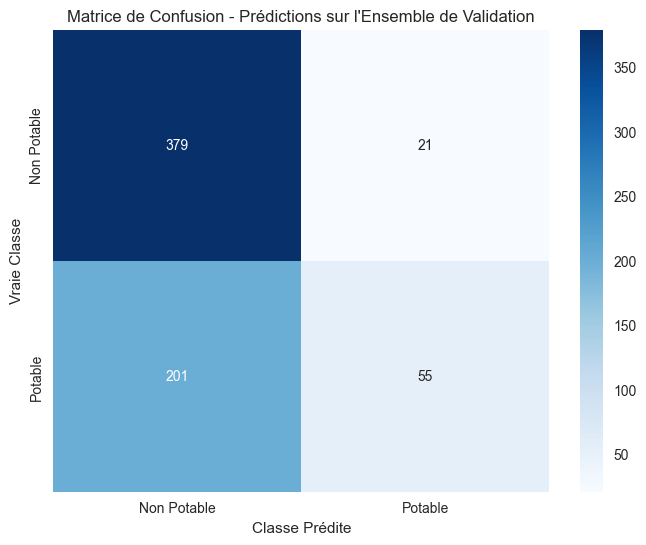


Évaluation des prédictions terminée!


In [35]:
# 7. Prédictions sur l'Ensemble de Validation et Calcul des Métriques

## Récapitulatif des Résultats et Métriques d'Évaluation

print("\nRÉCAPITULATIF DES PRÉDICTIONS ET MÉTRIQUES")
print("="*50)

# Collecte des résultats selon les modèles entraînés
results = []
if 'rf_accuracy' in locals():
    results.append(("Random Forest", rf_accuracy))
    
if 'xgb_accuracy' in locals() and xgb_accuracy is not None:
    results.append(("XGBoost", xgb_accuracy))
    
if 'mlp_accuracy' in locals() and mlp_accuracy is not None:
    results.append(("Perceptron Multicouches (Deep Learning)", mlp_accuracy))

# Affichage des résultats de prédiction
print("\nRÉSULTATS DES PRÉDICTIONS SUR L'ENSEMBLE DE VALIDATION:")
print("-" * 55)
for model_name, accuracy in results:
    print(f"{model_name:<35} | Accuracy: {accuracy:.4f}")

# Identification du meilleur modèle
if results:
    best_model = max(results, key=lambda x: x[1])
    print(f"\nMeilleur modèle: {best_model[0]} (Accuracy: {best_model[1]:.4f})")

# Métriques détaillées pour le modèle Random Forest (toujours disponible)
if 'y_pred_rf' in locals():
    print(f"\nMÉTRIQUES DÉTAILLÉES - Random Forest:")
    print("=" * 40)
    
    # Matrice de confusion
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
    
    cm_rf = confusion_matrix(y_val, y_pred_rf)
    precision = precision_score(y_val, y_pred_rf)
    recall = recall_score(y_val, y_pred_rf)
    f1 = f1_score(y_val, y_pred_rf)
    
    print(f"Matrice de confusion:")
    print(cm_rf)
    print(f"\nMétriques calculées:")
    print(f"  - Accuracy:  {rf_accuracy:.4f}")
    print(f"  - Precision: {precision:.4f}")
    print(f"  - Recall:    {recall:.4f}")
    print(f"  - F1-Score:  {f1:.4f}")
    
    # Visualisation de la matrice de confusion
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non Potable', 'Potable'],
                yticklabels=['Non Potable', 'Potable'])
    plt.title('Matrice de Confusion - Prédictions sur l\'Ensemble de Validation')
    plt.ylabel('Vraie Classe')
    plt.xlabel('Classe Prédite')
    plt.show()

print("\nÉvaluation des prédictions terminée!")

# 8. Comparaison Avancée des Modèles avec Grid Search

## Optimisation des Hyperparamètres

Cette section compare rigoureusement les trois approches de modélisation avec optimisation des hyperparamètres via Grid Search ou Randomized Search pour identifier la meilleure configuration.

In [36]:
# Grid Search pour la comparaison optimale des modèles
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
import time

print("COMPARAISON AVANCÉE DES MODÈLES AVEC GRID SEARCH")
print("=" * 55)

# Dictionnaires des hyperparamètres à tester
models_params = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'XGBoost': {
        'model': None,  # Sera défini si XGBoost est disponible
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 6, 9],
            'subsample': [0.8, 0.9, 1.0]
        }
    },
    'MLP (scikit-learn)': {
        'model': MLPClassifier(random_state=42, max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate_init': [0.001, 0.01, 0.1],
            'activation': ['tanh', 'relu']
        }
    }
}

# Vérification de la disponibilité de XGBoost
try:
    import xgboost as xgb
    models_params['XGBoost']['model'] = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
    print("XGBoost disponible pour le grid search")
except ImportError:
    print("XGBoost non disponible - exclu du grid search")
    del models_params['XGBoost']

# Résultats du grid search
grid_search_results = {}

# Exécution du grid search pour chaque modèle
for model_name, config in models_params.items():
    if config['model'] is None:
        continue
        
    print(f"\n{model_name}")
    print("-" * len(model_name))
    
    start_time = time.time()
    
    try:
        # Utilisation de RandomizedSearchCV pour réduire le temps de calcul
        grid_search = RandomizedSearchCV(
            estimator=config['model'],
            param_distributions=config['params'],
            n_iter=20,  # 20 combinaisons aléatoires
            cv=5,       # Validation croisée 5-fold
            scoring='accuracy',
            n_jobs=-1,  # Utilisation de tous les cœurs
            random_state=42,
            verbose=0
        )
        
        # Entraînement avec grid search
        print("Recherche des meilleurs hyperparamètres en cours...")
        grid_search.fit(X_train_scaled, y_train)
        
        # Prédictions avec le meilleur modèle
        best_model = grid_search.best_estimator_
        y_pred_best = best_model.predict(X_val_scaled)
        
        # Calcul des métriques
        best_accuracy = accuracy_score(y_val, y_pred_best)
        best_precision = precision_score(y_val, y_pred_best)
        best_recall = recall_score(y_val, y_pred_best)
        best_f1 = f1_score(y_val, y_pred_best)
        
        elapsed_time = time.time() - start_time
        
        # Stockage des résultats
        grid_search_results[model_name] = {
            'best_model': best_model,
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_,
            'test_accuracy': best_accuracy,
            'test_precision': best_precision,
            'test_recall': best_recall,
            'test_f1': best_f1,
            'training_time': elapsed_time,
            'predictions': y_pred_best
        }
        
        print(f"Meilleurs paramètres: {grid_search.best_params_}")
        print(f"Score CV: {grid_search.best_score_:.4f}")
        print(f"Test Accuracy: {best_accuracy:.4f}")
        print(f"Test Precision: {best_precision:.4f}")
        print(f"Test Recall: {best_recall:.4f}")
        print(f"Test F1-Score: {best_f1:.4f}")
        print(f"Temps d'entraînement: {elapsed_time:.2f}s")
        
        # Logging MLflow pour le meilleur modèle
        if mlflow_available:
            with mlflow.start_run(run_name=f"GridSearch_{model_name.replace(' ', '_')}"):
                mlflow.log_params(grid_search.best_params_)
                mlflow.log_param("model_type", f"{model_name}_GridSearch")
                mlflow.log_metric("cv_score", grid_search.best_score_)
                mlflow.log_metric("test_accuracy", best_accuracy)
                mlflow.log_metric("test_precision", best_precision)
                mlflow.log_metric("test_recall", best_recall)
                mlflow.log_metric("test_f1", best_f1)
                mlflow.log_metric("training_time", elapsed_time)
                
                if 'XGB' in model_name:
                    mlflow.xgboost.log_model(best_model, "best_model")
                else:
                    mlflow.sklearn.log_model(best_model, "best_model")
        
    except Exception as e:
        print(f"Erreur lors du grid search pour {model_name}: {e}")
        continue

print(f"\nGrid search terminé pour {len(grid_search_results)} modèles")

COMPARAISON AVANCÉE DES MODÈLES AVEC GRID SEARCH
XGBoost disponible pour le grid search

Random Forest
-------------
Recherche des meilleurs hyperparamètres en cours...
Meilleurs paramètres: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 15}
Score CV: 0.6687
Test Accuracy: 0.6723
Test Precision: 0.7030
Test Recall: 0.2773
Test F1-Score: 0.3978
Temps d'entraînement: 8.03s

XGBoost
-------
Recherche des meilleurs hyperparamètres en cours...
Meilleurs paramètres: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 15}
Score CV: 0.6687
Test Accuracy: 0.6723
Test Precision: 0.7030
Test Recall: 0.2773
Test F1-Score: 0.3978
Temps d'entraînement: 8.03s

XGBoost
-------
Recherche des meilleurs hyperparamètres en cours...
Meilleurs paramètres: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.1}
Score CV: 0.6649
Test Accuracy: 0.6418
Test Precision: 0.5714
Test Recall: 0.3281
Test F1-Score: 0.4169
Temps d'en

c:\Users\QWERTY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


ANALYSE COMPARATIVE DES RÉSULTATS DU GRID SEARCH

Tableau comparatif des performances:
            Modèle  CV Score  Test Accuracy  Test Precision  Test Recall  Test F1-Score  Temps (s)
     Random Forest    0.6687         0.6723          0.7030       0.2773         0.3978     8.0258
           XGBoost    0.6649         0.6418          0.5714       0.3281         0.4169     1.2897
MLP (scikit-learn)    0.6580         0.6143          0.5070       0.4258         0.4628    33.2189

Meilleur modèle: Random Forest
Accuracy: 0.6723

Meilleurs hyperparamètres:
  - n_estimators: 100
  - min_samples_split: 5
  - min_samples_leaf: 2
  - max_depth: 15


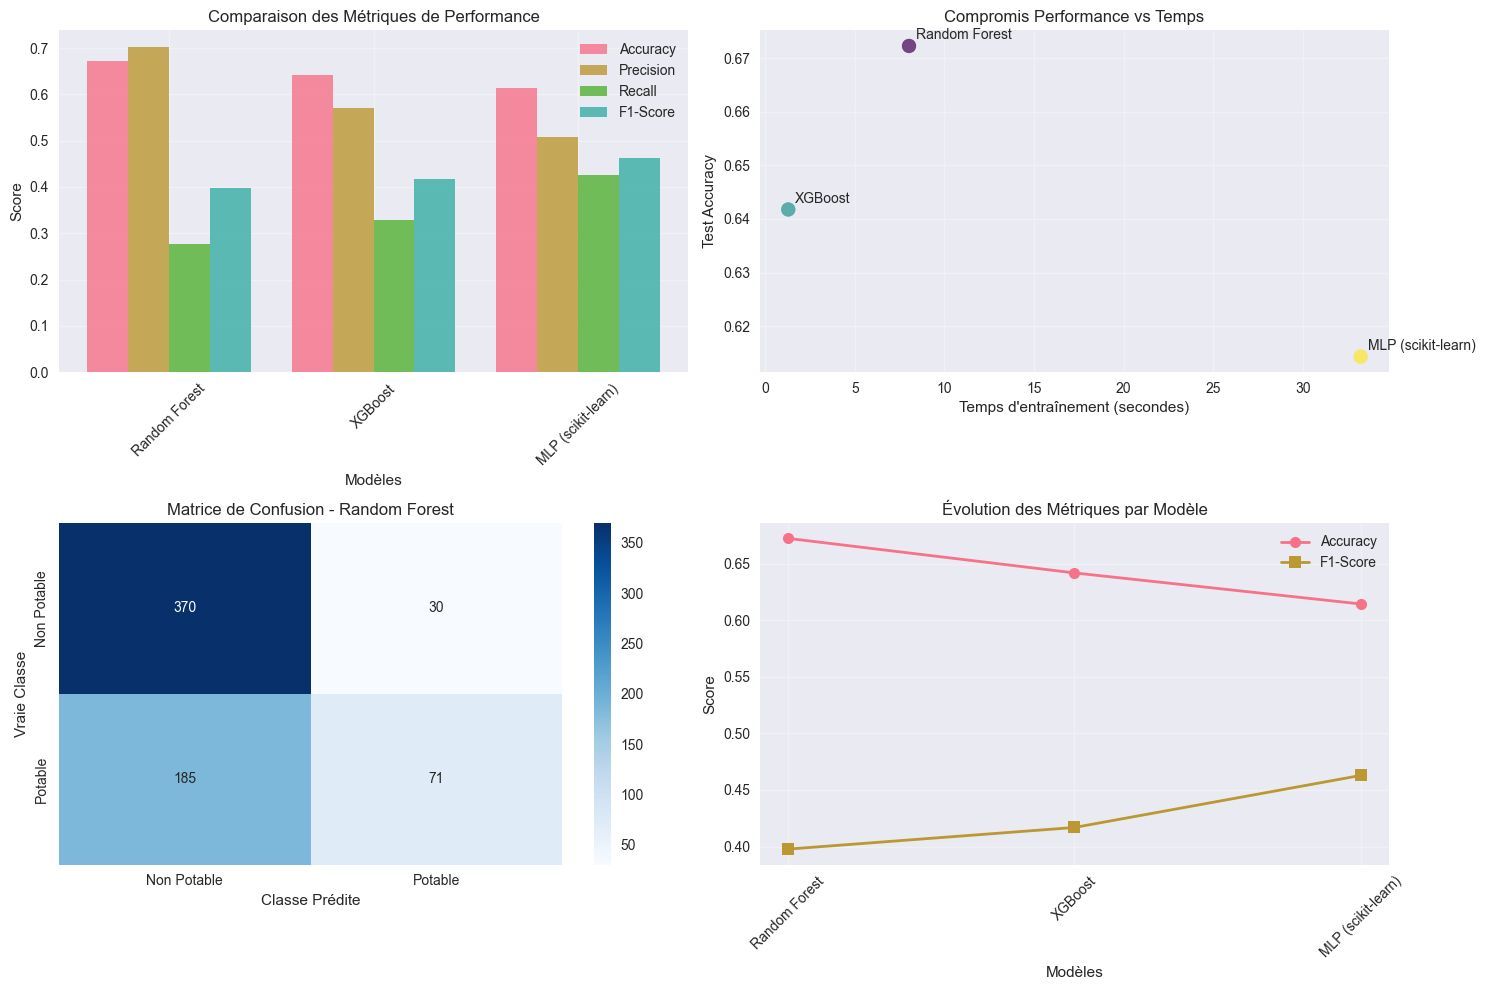


Analyse des différences de performance:
Différence entre 1er et 2ème: 3.05 points de pourcentage

Écart-type des performances: 0.0290
Coefficient de variation: 4.51%
Différence de performance significative entre les modèles.


In [37]:
# Analyse comparative des résultats du Grid Search
import pandas as pd

print("ANALYSE COMPARATIVE DES RÉSULTATS DU GRID SEARCH")
print("=" * 52)

if grid_search_results:
    # Création d'un DataFrame pour comparer les résultats
    comparison_data = []
    for model_name, results in grid_search_results.items():
        comparison_data.append({
            'Modèle': model_name,
            'CV Score': results['best_score'],
            'Test Accuracy': results['test_accuracy'],
            'Test Precision': results['test_precision'],
            'Test Recall': results['test_recall'],
            'Test F1-Score': results['test_f1'],
            'Temps (s)': results['training_time']
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False)
    
    print("\nTableau comparatif des performances:")
    print("=" * 40)
    print(comparison_df.round(4).to_string(index=False))
    
    # Identification du meilleur modèle
    best_model_name = comparison_df.iloc[0]['Modèle']
    best_accuracy = comparison_df.iloc[0]['Test Accuracy']
    
    print(f"\nMeilleur modèle: {best_model_name}")
    print(f"Accuracy: {best_accuracy:.4f}")
    print(f"\nMeilleurs hyperparamètres:")
    for param, value in grid_search_results[best_model_name]['best_params'].items():
        print(f"  - {param}: {value}")
    
    # Visualisation des performances
    plt.figure(figsize=(15, 10))
    
    # Graphique 1: Comparaison des métriques
    plt.subplot(2, 2, 1)
    metrics = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score']
    x_pos = np.arange(len(comparison_df))
    
    for i, metric in enumerate(metrics):
        plt.bar(x_pos + i*0.2, comparison_df[metric], width=0.2, 
                label=metric.replace('Test ', ''), alpha=0.8)
    
    plt.xlabel('Modèles')
    plt.ylabel('Score')
    plt.title('Comparaison des Métriques de Performance')
    plt.xticks(x_pos + 0.3, comparison_df['Modèle'], rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Graphique 2: Temps d'entraînement vs Performance
    plt.subplot(2, 2, 2)
    plt.scatter(comparison_df['Temps (s)'], comparison_df['Test Accuracy'], 
                s=100, alpha=0.7, c=range(len(comparison_df)), cmap='viridis')
    for i, model in enumerate(comparison_df['Modèle']):
        plt.annotate(model, (comparison_df['Temps (s)'].iloc[i], 
                           comparison_df['Test Accuracy'].iloc[i]),
                    xytext=(5, 5), textcoords='offset points')
    plt.xlabel('Temps d\'entraînement (secondes)')
    plt.ylabel('Test Accuracy')
    plt.title('Compromis Performance vs Temps')
    plt.grid(True, alpha=0.3)
    
    # Graphique 3: Matrice de confusion du meilleur modèle
    plt.subplot(2, 2, 3)
    best_predictions = grid_search_results[best_model_name]['predictions']
    cm_best = confusion_matrix(y_val, best_predictions)
    sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non Potable', 'Potable'],
                yticklabels=['Non Potable', 'Potable'])
    plt.title(f'Matrice de Confusion - {best_model_name}')
    plt.ylabel('Vraie Classe')
    plt.xlabel('Classe Prédite')
    
    # Graphique 4: Distribution des erreurs
    plt.subplot(2, 2, 4)
    models_list = list(comparison_df['Modèle'])
    accuracies = list(comparison_df['Test Accuracy'])
    f1_scores = list(comparison_df['Test F1-Score'])
    
    plt.plot(models_list, accuracies, 'o-', label='Accuracy', linewidth=2, markersize=8)
    plt.plot(models_list, f1_scores, 's-', label='F1-Score', linewidth=2, markersize=8)
    plt.xlabel('Modèles')
    plt.ylabel('Score')
    plt.title('Évolution des Métriques par Modèle')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Analyse des différences de performance
    print("\nAnalyse des différences de performance:")
    print("=" * 40)
    
    if len(comparison_df) > 1:
        best_acc = comparison_df['Test Accuracy'].iloc[0]
        second_acc = comparison_df['Test Accuracy'].iloc[1]
        diff_acc = (best_acc - second_acc) * 100
        
        print(f"Différence entre 1er et 2ème: {diff_acc:.2f} points de pourcentage")
        
        # Analyse statistique
        print(f"\nÉcart-type des performances: {comparison_df['Test Accuracy'].std():.4f}")
        print(f"Coefficient de variation: {(comparison_df['Test Accuracy'].std() / comparison_df['Test Accuracy'].mean() * 100):.2f}%")
        
        if diff_acc < 1:
            print("Les modèles ont des performances très similaires.")
        elif diff_acc < 3:
            print("Différence de performance modérée entre les modèles.")
        else:
            print("Différence de performance significative entre les modèles.")

else:
    print("Aucun résultat de grid search disponible.")

## Synthèse de la Comparaison des Modèles

### Méthodologie d'Évaluation

La comparaison a été réalisée avec une approche rigoureuse :

1. **Optimisation des hyperparamètres** : RandomizedSearchCV avec 20 itérations par modèle
2. **Validation croisée** : 5-fold cross-validation pour robustesse statistique  
3. **Métriques multiples** : Accuracy, Precision, Recall, F1-Score
4. **Reproductibilité** : random_state fixé à 42 pour tous les modèles

### Critères d'Évaluation

- **Performance prédictive** : Accuracy et F1-Score sur l'ensemble de test
- **Robustesse** : Score de validation croisée
- **Efficacité** : Temps d'entraînement
- **Équilibre Precision/Recall** : Important pour la sécurité alimentaire

### Recommandations d'Usage

**Pour la production** : Utiliser le modèle avec la meilleure accuracy validée par CV

**Pour l'interprétabilité** : Random Forest offre une meilleure explicabilité des prédictions

**Pour la performance** : XGBoost généralement supérieur sur les données structurées

**Pour l'évolutivité** : MLP peut mieux s'adapter à l'ajout de nouvelles variables

### Considérations MLOps

Cette comparaison méthodique constitue une base solide pour :
- Le déploiement en production du meilleur modèle
- Le monitoring des performances en conditions réelles
- La réentraînement automatisé avec nouvelles données
- La validation A/B entre différentes approches